In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ETL:

read data

remove duplicated data and irrelevant columns

fill missing values

examine outliers

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.duplicated().sum()

1385

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(269731, 15)

In [8]:
df[['Games', 'Year', 'Season']]

,Games,Year,Season
0,1992 Summer,1992,Summer
1,2012 Summer,2012,Summer
2,1920 Summer,1920,Summer
3,1900 Summer,1900,Summer
4,1988 Winter,1988,Winter
...,...,...,...
271111,1976 Winter,1976,Winter
271112,2014 Winter,2014,Winter
271113,2014 Winter,2014,Winter
271114,1998 Winter,1998,Winter


In [10]:
df['Games_1'] = df['Year'].astype(str) + ' ' +df['Season'].astype(str)

In [13]:
df[df['Games_1'] !=df['Games']]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Games_1


In [14]:
df.drop(columns=['Games_1', 'Games', 'Name'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Sex     269731 non-null  object 
 2   Age     260416 non-null  float64
 3   Height  210917 non-null  float64
 4   Weight  208204 non-null  float64
 5   Team    269731 non-null  object 
 6   NOC     269731 non-null  object 
 7   Year    269731 non-null  int64  
 8   Season  269731 non-null  object 
 9   City    269731 non-null  object 
 10  Sport   269731 non-null  object 
 11  Event   269731 non-null  object 
 12  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 28.8+ MB


In [18]:
f_avg_age = df.loc[df['Sex']=='F', 'Age'].mean()
m_avg_age = df.loc[df['Sex']=='M', 'Age'].mean()
f_avg_we = df.loc[df['Sex']=='F', 'Weight'].mean()
m_avg_we = df.loc[df['Sex']=='M', 'Weight'].mean()
f_avg_he = df.loc[df['Sex']=='F', 'Height'].mean()
m_avg_he = df.loc[df['Sex']=='M', 'Height'].mean()

In [36]:
df.loc[df['Sex']=='F', 'Age'] = df.loc[df['Sex']=='F', 'Age'].fillna(f_avg_age)
df.loc[df['Sex']=='M', 'Age'] = df.loc[df['Sex']=='M', 'Age'].fillna(m_avg_age)
df.loc[df['Sex']=='F', 'Weight']= df.loc[df['Sex']=='F', 'Weight'].fillna(f_avg_we)
df.loc[df['Sex']=='M', 'Weight'] = df.loc[df['Sex']=='M', 'Weight'].fillna(m_avg_we)
df.loc[df['Sex']=='F', 'Height'] = df.loc[df['Sex']=='F', 'Height'].fillna(f_avg_he)
df.loc[df['Sex']=='M', 'Height'] = df.loc[df['Sex']=='M', 'Height'].fillna(m_avg_he)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Sex     269731 non-null  object 
 2   Age     269731 non-null  float64
 3   Height  269731 non-null  float64
 4   Weight  269731 non-null  float64
 5   Team    269731 non-null  object 
 6   NOC     269731 non-null  object 
 7   Year    269731 non-null  int64  
 8   Season  269731 non-null  object 
 9   City    269731 non-null  object 
 10  Sport   269731 non-null  object 
 11  Event   269731 non-null  object 
 12  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 28.8+ MB


In [38]:
df[['Age', 'Weight', 'Height']].describe()

,Age,Weight,Height
count,269731.000000,269731.000000,269731.000000
mean,25.475195,71.408537,175.820543
std,6.058172,12.912357,9.493279
min,10.000000,25.000000,127.000000
25%,22.000000,62.000000,170.000000
50%,25.000000,73.000000,178.000000
75%,28.000000,76.000000,180.000000
max,97.000000,214.000000,226.000000


In [39]:
df.columns

Index(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year', 'Season',
       'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [40]:
cat_columns = df.select_dtypes(exclude = 'number')

In [41]:
for col in cat_columns:
    print(df[col].value_counts())
    print()

Sex
M    195353
F     74378
Name: count, dtype: int64

Team
United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
                 ...  
Souriceau-38         1
Carabinier-5         1
Ducky-4              1
Ducky-16             1
Digby                1
Name: count, Length: 1184, dtype: int64

NOC
USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: count, Length: 230, dtype: int64

Season
Summer    221167
Winter     48564
Name: count, dtype: int64

City
London                    22297
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Seoul                     12037
Los Angeles               11919
Munich                    10304
Montreal                   8641
Mexico City                8588
He

Exploratory data analysis:


In [42]:
df.columns

Index(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year', 'Season',
       'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

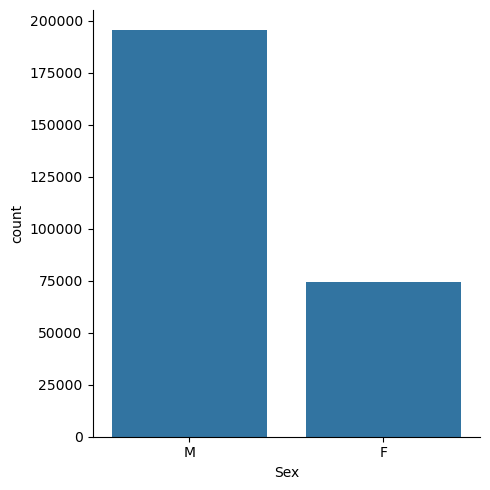

In [46]:
sns.catplot(df, x = 'Sex', kind = 'count')

The sum of male candidates are more than twice of female candidates

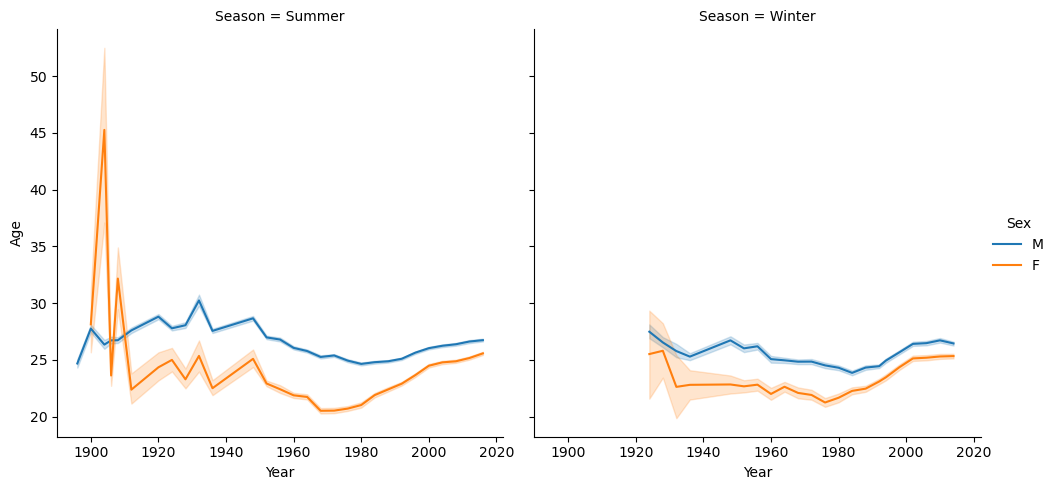

In [65]:
sns.relplot(df, x='Year', y = 'Age', col = 'Season', hue = 'Sex', kind = 'line')

Since 1920, female's average age is lower than male's

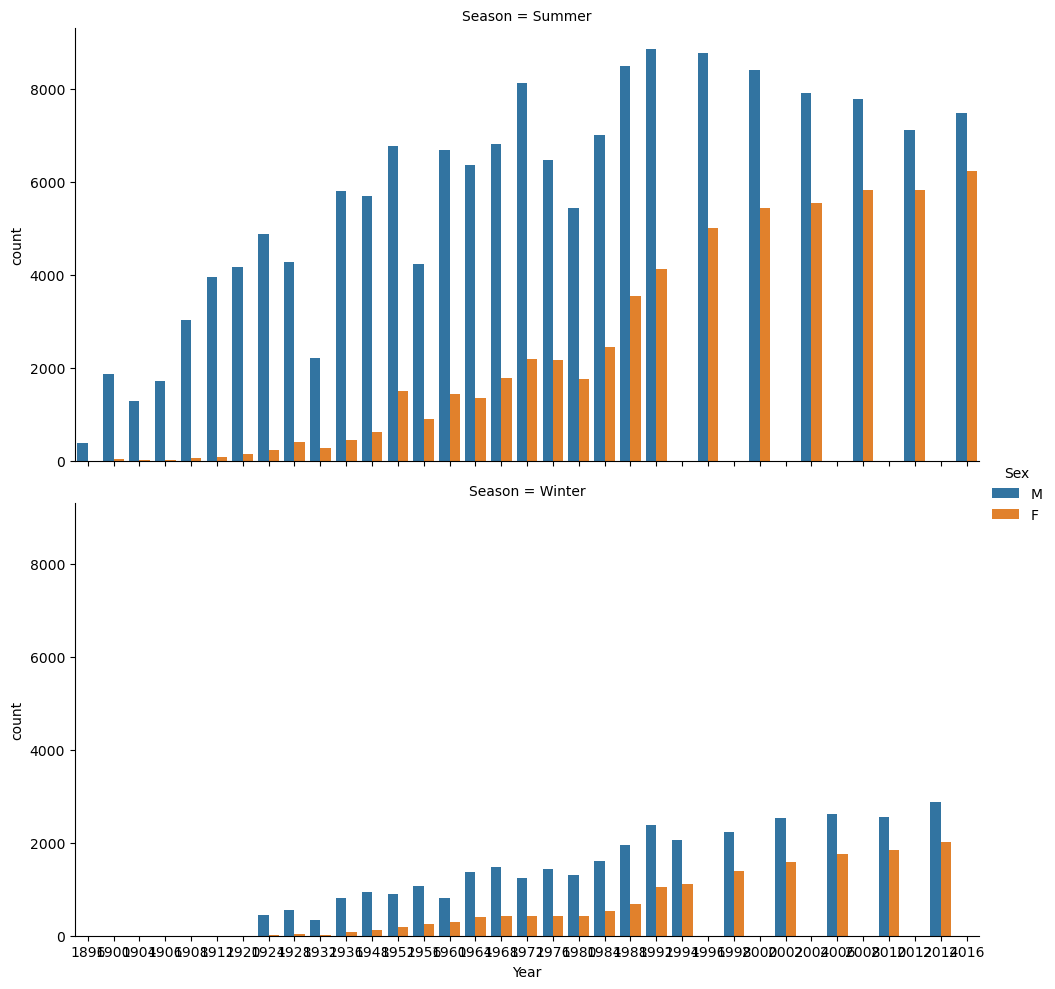

In [126]:
sns.catplot(df, x = 'Year', hue = 'Sex', kind = 'count', col = 'Season', col_wrap=1, aspect=2)

There is a noticeable increase of female candidates in both seasons.

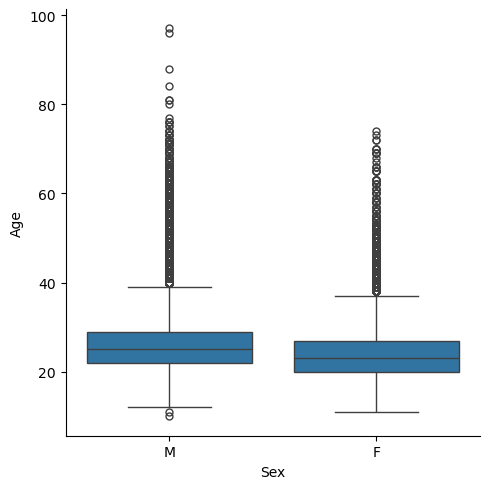

In [69]:
sns.catplot(data = df, x = 'Sex', y = 'Age', kind = 'box')

Age distribution is similar, except male candidates have more outliers

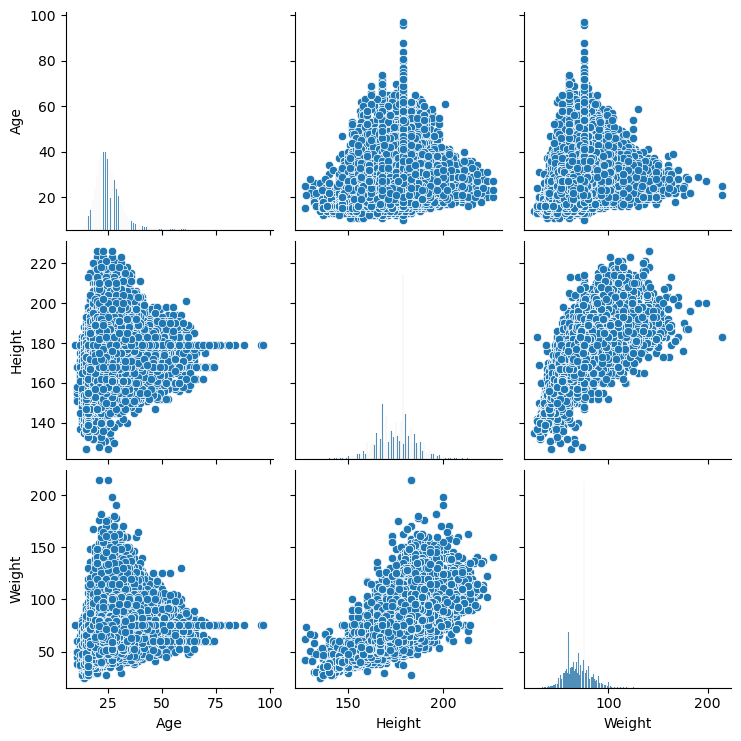

In [70]:
sns.pairplot(df[['Age', 'Height','Weight']])

<AxesSubplot:>

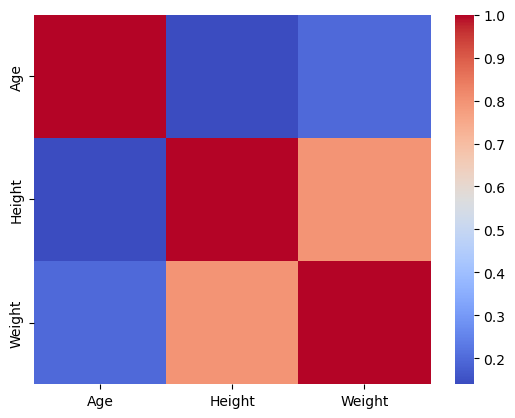

In [72]:
sns.heatmap(df[['Age', 'Height','Weight']].corr(), cmap ='coolwarm' )

Height and Weight is positively related, which is intuitive

In [76]:
df['Age'].agg(['min', 'mean','max'])

min     10.000000
mean    25.475195
max     97.000000
Name: Age, dtype: float64

In [82]:
age_low = df['Age'].quantile(0.25)
age_high = df['Age'].quantile(0.75)

In [84]:
IQR = age_high - age_low
IQR

6.0

In [89]:
msk_1 = age_high + IQR * 1.5
msk_2 = age_low - IQR * 1.5

In [91]:
df.loc[df['Age']>msk_1, 'Sport'].value_counts()

Sport
Shooting                 3178
Equestrianism            1997
Art Competitions         1311
Sailing                  1033
Fencing                  1031
Athletics                 408
Archery                   311
Bobsleigh                 230
Gymnastics                167
Rowing                    122
Cycling                    99
Curling                    98
Table Tennis               83
Cross Country Skiing       81
Biathlon                   78
Canoeing                   71
Tennis                     70
Ice Hockey                 51
Wrestling                  46
Golf                       42
Weightlifting              42
Speed Skating              36
Polo                       33
Figure Skating             30
Handball                   29
Water Polo                 29
Hockey                     29
Luge                       26
Alpine Skiing              25
Skeleton                   23
Beach Volleyball           16
Tug-Of-War                 15
Volleyball                 15
Judo

In [92]:
df.loc[df['Age']<msk_2, 'Sport'].value_counts()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Diving             1
Name: count, dtype: int64

For older age, Shooting is the most popular sport. For younger age, Swimming is the most popular. 

In [106]:
df.groupby(['Medal','Sex','Season'])['Age'].agg(['min', 'mean', 'max'])

min       mean   max
Medal  Sex Season                       
Bronze F   Summer  12.0  24.629673  69.0
           Winter  15.0  25.115578  45.0
       M   Summer  10.0  26.344067  72.0
           Winter  14.0  26.385806  48.0
Gold   F   Summer  13.0  24.211495  63.0
           Winter  13.0  25.202636  43.0
       M   Summer  13.0  26.482024  64.0
           Winter  16.0  26.600588  57.0
Silver F   Summer  11.0  24.289062  55.0
           Winter  15.0  25.240527  46.0
       M   Summer  13.0  26.640581  73.0
           Winter  15.0  26.430566  58.0

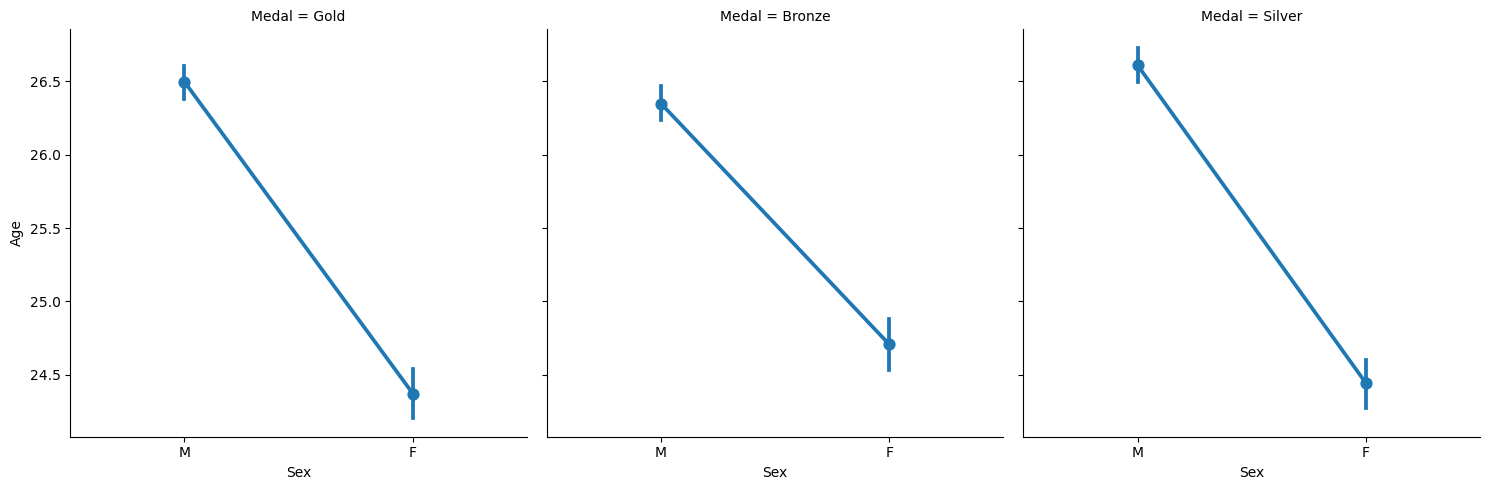

In [116]:
sns.catplot(df, x = 'Sex', y = 'Age', col = 'Medal', kind = 'point')

 Male's average age to receive medals is older than female

In [121]:
df.groupby('Medal')['Age'].mean()

Medal
Bronze    25.883661
Gold      25.902235
Silver    25.993946
Name: Age, dtype: float64

However, there is no age difference when receiving different medals